In [1]:
import rpy2
import rpy2.robjects.lib.ggplot2 as ggplot2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
base = importr('base')

# the base of rpy2 plotting is matplotlib, thus we need to declare
# it inline in order to see the plots in the notebook
%matplotlib inline

# we need to activate the automatic conversion for pandas
from rpy2.robjects import pandas2ri
pandas2ri.activate()

# load the needed extension for the %%R cell magic
%load_ext rpy2.ipython

import pandas as pd
import numpy as np

%config IPCompleter.greedy=True

import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 200

In [5]:
#df = pd.read_csv("local-3f97512/combined.data")
df = pd.read_csv("local-932185b/combined.data")
df

,work_type,work_amount,iters,reqs_per_iter,proto,machine,container,Elapsed_us,Total_us,Server_us
0,0B+sqrts,1000,10000,3,burrito,localhost,baremetal,678,281,7
1,0B+sqrts,1000,10000,3,burrito,localhost,baremetal,755,76,6
2,0B+sqrts,1000,10000,3,burrito,localhost,baremetal,827,71,6
3,0B+sqrts,1000,10000,3,burrito,localhost,baremetal,1235,216,6
4,0B+sqrts,1000,10000,3,burrito,localhost,baremetal,1309,73,6
...,...,...,...,...,...,...,...,...,...,...
539995,512B+sqrts,1000,10000,3,unix,localhost,docker,9599547,163,11
539996,512B+sqrts,1000,10000,3,unix,localhost,docker,9599699,150,11
539997,512B+sqrts,1000,10000,3,unix,localhost,docker,9600389,224,11
539998,512B+sqrts,1000,10000,3,unix,localhost,docker,9600567,177,11


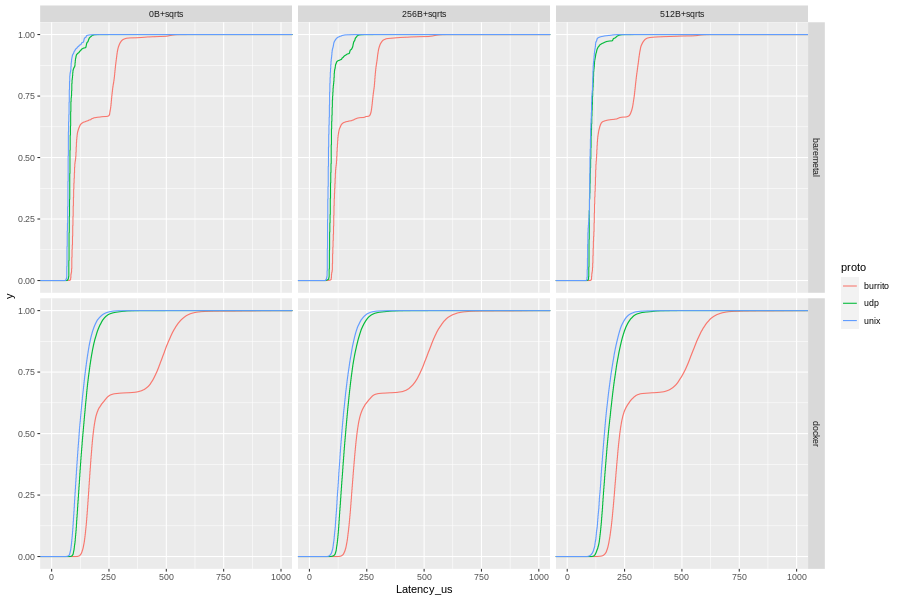

In [6]:
%%R -i df -w 900 -h 600

library(ggplot2)

df$Latency_us <- df$Total_us - df$Server_us
ggplot(df, aes(x=Latency_us, colour=proto)) + 
    facet_grid(container~work_type) + 
    stat_ecdf() + coord_cartesian(xlim=c(0,1000))

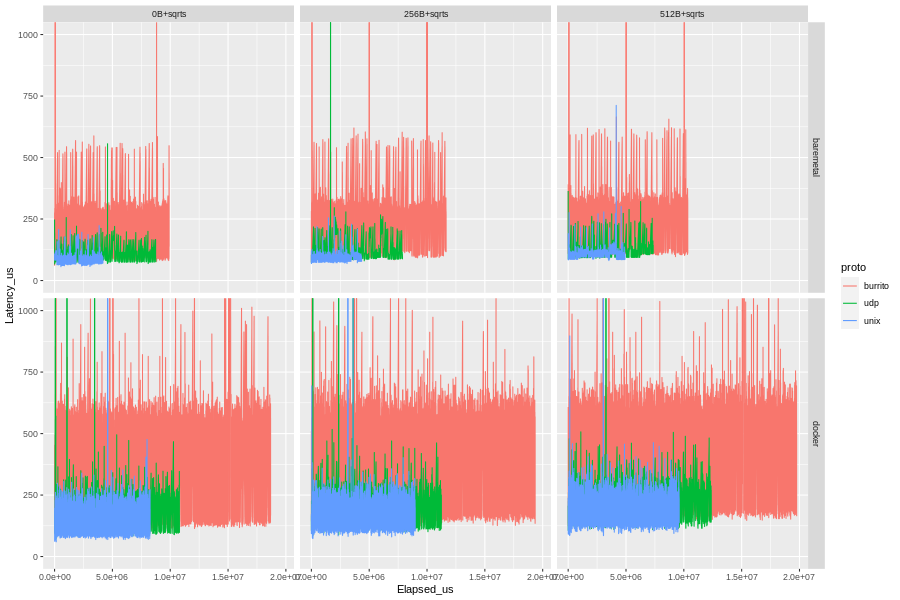

In [8]:
%%R -i df -w 900 -h 600

library(ggplot2)

df$Latency_us <- df$Total_us - df$Server_us
ggplot(df, aes(x=Elapsed_us, y=Latency_us, colour=proto)) + 
    facet_grid(container~work_type) + 
    geom_line() + coord_cartesian(ylim=c(0,1000))

In [31]:
docker_df = df.query("container == 'docker'")

In [32]:
docker_df.to_csv("./local-rpcs.csv")

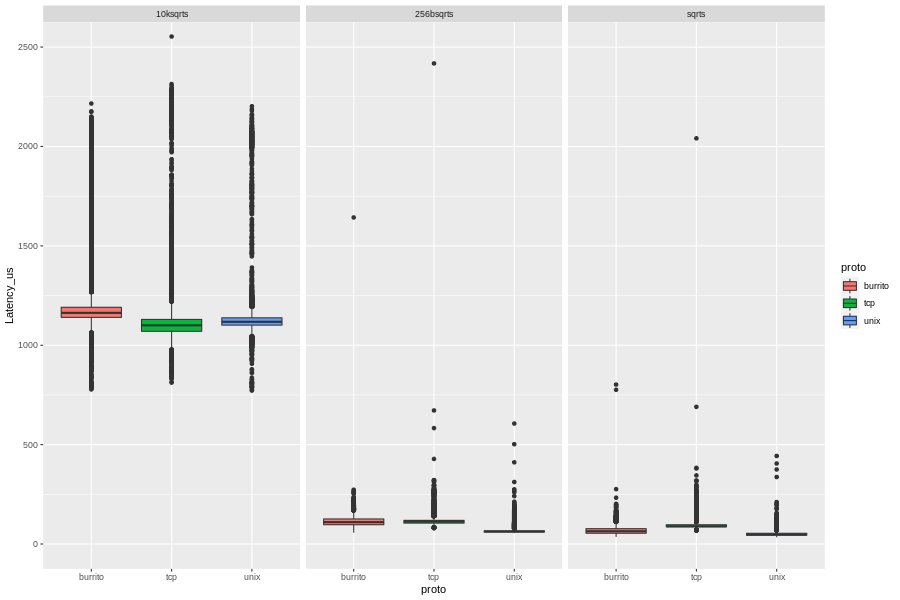

In [28]:
%%R -i docker_df -w 900 -h 600

library(ggplot2)

df <- docker_df
df$Latency_us <- df$Total_us - df$Server_us
ggplot(df, aes(x=proto, y=Latency_us, fill=proto)) + 
    facet_wrap(~work_type) + 
    geom_boxplot() + coord_cartesian(ylim=c(0,2500))

In [29]:
anyc_df = pd.read_csv("remote-anycast-bincode/combined.data")
anyc_df = anyc_df.to_csv("anycast-rpcs.csv")
anyc_df

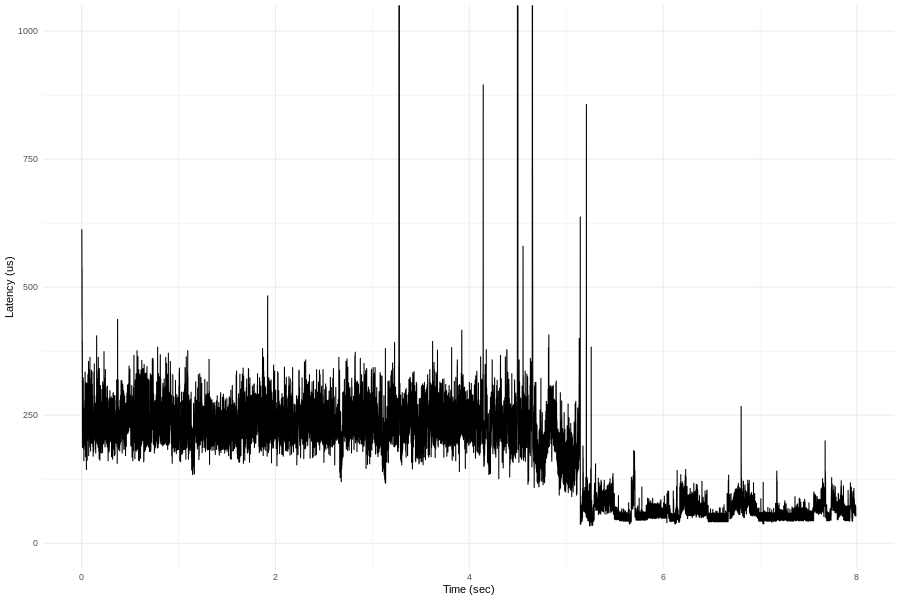

In [26]:
%%R -i anyc_df -w 900 -h 600

library(ggplot2)

df <- anyc_df
df$Elapsed_sec <- df$Elapsed_us / 1e6
df$Net_us <- df$Total_us - df$Server_us

ggplot(df, aes(x=Elapsed_sec, y=Net_us)) + 
    geom_line() + 
    coord_cartesian(ylim=c(0, 1000)) + 
    theme_minimal() + xlab("Time (sec)") + ylab("Latency (us)")